<a href="https://colab.research.google.com/github/Mevaria/AAI614_Wehbe/blob/main/Notebook6.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vanessa Wehbe

# AAI614: Data Science & its Applications

*Notebook 6.1: Classification vs Clustering*

Source: This notebook contains excerpts from *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurélien Géron*

Define the default font sizes to make the figures prettier:

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Classification vs Clustering

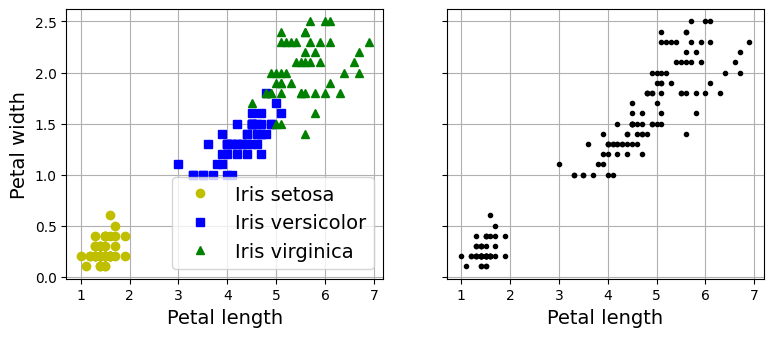

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

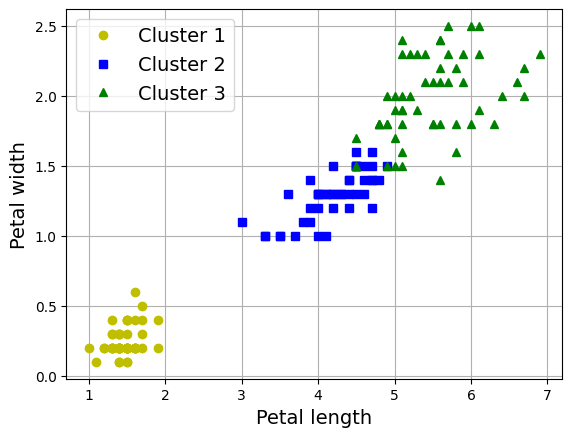

In [10]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

What's the ratio of iris plants we assigned to the right cluster?

In [11]:
(y_pred==y).sum() / len(y_pred)

np.float64(0.9666666666666667)

## Example using the Breast Cancer Dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, classification_report

# Load data
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

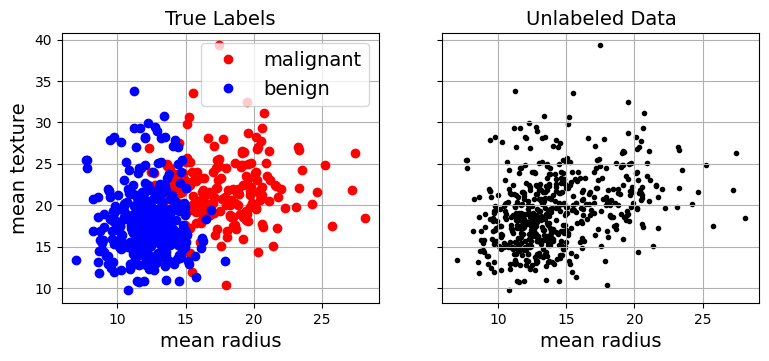

In [15]:
# Visualize just two features for simplicity
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 1], "ro", label=target_names[0])
plt.plot(X[y==1, 0], X[y==1, 1], "bo", label=target_names[1])
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("True Labels")
plt.legend()
plt.grid()

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.xlabel(data.feature_names[0])
plt.title("Unlabeled Data")
plt.tick_params(labelleft=False)
plt.grid()

plt.show()

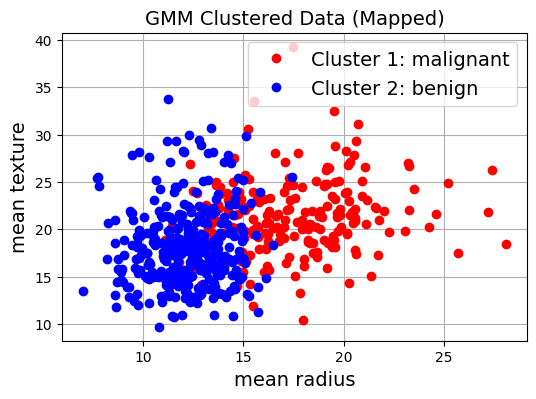

In [19]:
# Apply Gaussian Mixture clustering
y_pred = GaussianMixture(n_components=2, random_state=42).fit(X).predict(X)

# Map cluster IDs to true labels
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y == class_id])
    mapping[mode] = class_id

y_pred_mapped = np.array([mapping[c] for c in y_pred])

# Visualize clusters
plt.figure(figsize=(6, 4))
plt.plot(X[y_pred_mapped==0, 0], X[y_pred_mapped==0, 1], "ro", label=f"Cluster 1: {target_names[0]}")
plt.plot(X[y_pred_mapped==1, 0], X[y_pred_mapped==1, 1], "bo", label=f"Cluster 2: {target_names[1]}")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("GMM Clustered Data (Mapped)")
plt.legend()
plt.grid()
plt.show()

In [18]:
print("Cluster Accuracy:", (y_pred_mapped == y).sum() / len(y))

Cluster Accuracy: 0.9507908611599297
